### Introduction: The Titanic Analytical Case

<br>

**Context** 
<br>
The data represents information pertaining to the travelers who went on the fateful journey on the RMS Titanic on April 1912. 

The analysis seeks to understand what sorts of people were likely to survive. In particular, the tools of machine learning are used to predict which passengers survived the tragedy.

<br>

**Analytical Goals**
1. Explore the data via tables and visualizations
2. Fit a model and evaluate the accuracy on a test sample

Source: [Kaggle](https://www.kaggle.com/c/titanic/overview)

***

In [2]:
# Importing a set of analytic libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import os

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [77]:
print(os.getcwd())

#Importing data
train = pd.read_csv("/Users/ramavishwanathan/Desktop/Rama Files/purse/ml_all/ML_Projects/Titanic/train.csv", )

/Users/ramavishwanathan/Desktop/Rama Files/purse/ml_all/ML_Projects


***
<br>

The next step is to get a **quick look** at the data using the head() and the info() and describe() methods. This *triad* of methods provides a good, initial understanding of any data-set:
1. The `head()` method showcases the top 5 rows of the dataset
2. The `info()` method provides a quick description of the data, attribute (variable) names, their types and the degree to which these variables are populated (i.e. missing values)
3. The `describe()` method provides detailed numerical summary of the numberical attributes *(sample statistics such as mean, median, quartiles, min, max)*

<br>

In [3]:
#Getting top level characteristics of data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We have got the complete list of variables with the added understanding of the missing values in each variable. Refer to [this](https://www.kaggle.com/c/titanic/data) Kaggle link for the explanations of the variables
<br>

Looking at the above table, categories like `PassengerId`, `Survived` and `Pclass` are coded as numeric variables (whereas they are categorical). The next set of code fragments will **fix** this.

In [6]:
#convert to categorical
train_copy = train.copy()

# Survived
train["Survived"] = train["Survived"].astype('category')
train["Survived"].cat.categories

# Pclass
train["Pclass"] = train["Pclass"].astype('category')
train["Pclass"].cat.categories

# Passenger Id
train["PassengerId"] = train["PassengerId"].astype('category')
train["PassengerId"].cat.categories

# Evidence, that the above three variables have been defined as Categorical
train.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200




***

### Exploratory Analysis

#### Univariate Analysis for developing a better understanding of the variables

The first set of plots will be to analyze what seem like key variables:
* **Gender** split of passengers,
* The **class** that they traveled in,
* Port of **embankment** *(it'll be surprising if this turns out to be an important variable)* 
* The **survival** rate: how many passengers made it and how many didn't

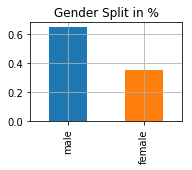

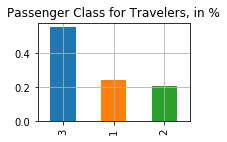

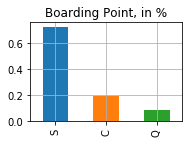

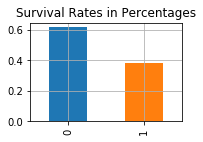

In [7]:
#lets try to do 4 exploratory subplots 
# IMP: this is how its done for categorical variables

plt.figure(1)
#Gender Split
plt.subplot(2,2,1)
train["Sex"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Gender Split in %")
plt.grid()
plt.show()


#Pasenger Class
plt.subplot(2,2,2)
train["Pclass"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Passenger Class for Travelers, in %")
plt.grid()
plt.show()

#Where did they board
plt.subplot(2,2,3)
train["Embarked"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Boarding Point, in %")
plt.grid()
plt.show()

#showcasing the above in terms of percentages
plt.subplot(2,2,4)
train["Survived"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Survival Rates in Percentages")
plt.grid()
plt.show()

The **key observations** are:
1. ~60% of the passengers were male
2. ~20% of the passengers traveled first class, ~20% traveled second, while 60% traveled third class
3. Almost 75% of the paseengers boarded at Southampton
4. ~40% of the passengers survived the incident; which means that a **huge** ~60% of the pasengers did not survive 

***

**Age of the passenger** is seemingly a continous variable. The next set of charts and analysis will explore this variable and convert it into categories, if needed.

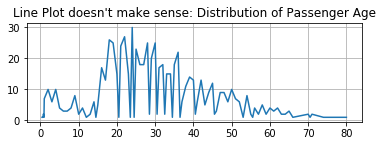

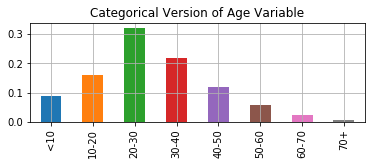

,Name
AgeCat,
<10,64
10-20,115
20-30,230
30-40,155
40-50,86
50-60,42
60-70,17
70+,5
All,714


In [8]:
# This is the way to do a line plot for a continous variable
# IMP: This will keep coming up again and again 
plt.subplot(2,1,1)
train['Age'].value_counts().sort_index().plot.line()
plt.title("Line Plot doesn't make sense: Distribution of Passenger Age")
plt.grid()
plt.show()

# Creating 'AgeCat' variable; class interval of 10. pd.cut is a very useful functionality for this
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70','70+']

train['AgeCat'] = pd.cut(train['Age'], bins, labels=names)

# Plotting the Categorical age varible (AgeCat)
plt.subplot(2,1,2)
train["AgeCat"].value_counts(normalize = True).reindex(['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70','70+']).plot(kind = "bar")
plt.title("Categorical Version of Age Variable")
plt.grid()
plt.show()

# The categorical chart isn't very indicative of the frequency counts for the higher age groups, hence creating a pivot
pd.pivot_table(train, index = ['AgeCat'], values = ['Name'],aggfunc=len, margins = True )

The **key observations** pertaining to the age variable are:
1. a significant 10% are under 10 years in age
2. ~50% are between 20-40 years old
3. A fraction (~6%) are over 60 years old
4. Age variable is not available for all the travelers **(has to be addressed)**

***

Performing a quick exploration of the `fare` variable. Also figuring out the *degree of association* of this variable with the passenger `class`

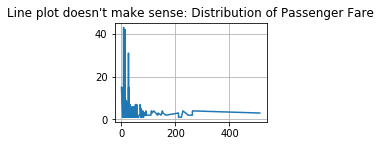

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550
All,32.204208


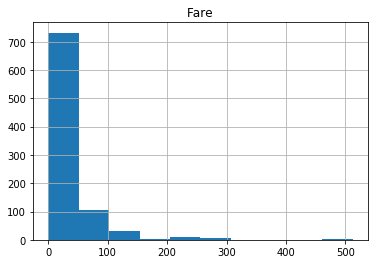

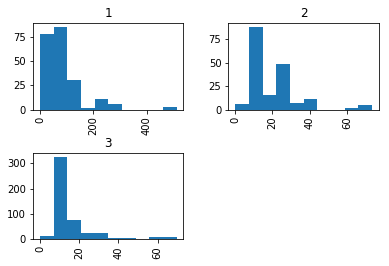

In [9]:
# Quick exploration of the fare variable - plotting a line (a line plot doesn't make sense here)
plt.subplot(2,2,1)
train['Fare'].value_counts().sort_index().plot.line()
plt.title("Line plot doesn't make sense: Distribution of Passenger Fare")
plt.grid()
plt.show()

# Quick exploration of the fare variable - plotting a histogram that makes more sense
hist = train.hist( column = "Fare", by = None, grid = True )

#understanding relationship between passenger fare and passenger class - visually **VERY COOL**
hist2 = train.hist( column = "Fare", by = 'Pclass', grid = True )

#A quick pivot that shows the average fares by Pclass
pd.pivot_table(train, index = ['Pclass'], values = ['Fare'],aggfunc=np.mean, margins = True )


There seems to be a definite relationship beween the `Pclass` and the `Fare` variables (as expected). For model building purposes, it probably **doesn't** make sense including this variable in the 1st pass.

***

There are two variables that still need to be explored:
1. `SibSp` number of siblings and spouses (of the pasenger) aboard
2. `Parch` number of parents and children (of the passenger) aboard the vessel

A couple of discriptive visualizations will be created for these variables

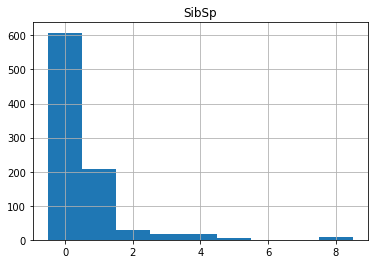

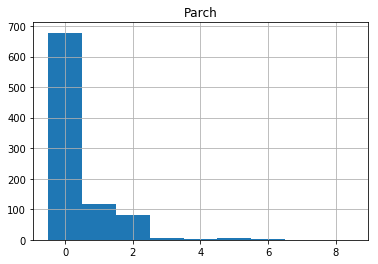

In [10]:
# Quick exploration of the SibSp variable - plotting a histogram that makes more sense
hist = train.hist( column = "SibSp", by = None, grid = True, bins = np.arange(10) - 0.5 )

# Quick exploration of the Parch variable - plotting a histogram that makes more sense
hist = train.hist( column = "Parch", by = None, grid = True, bins = np.arange(10) - 0.5 )


Both `SibSp` and `Parch` variables have low frequency counts. I **won't** be analysing/including them in the 1st pass of the model

***

#### Developing and testing hypotheses

In this section, the goal is develop and test out hypothesis i.e. understand which factors are indicative of a fatality in the Titanic disaster. Couple of examples include:
* are women more likely to survive the incident?
* are people traveling on a higher class ticket more likely to survive the accident?
* Is there any association between survival rate and the port of boarding (embarkment) of the passenger?

These set of analyses will help in building an intuitive understanding of the key variables from an analytic perspective. These variables will then be used for buiding the machine learning models
<br>

In [11]:
# How many died, and how many survived?
pd.pivot_table(train, index = ['Survived'], values = ['Name'],aggfunc=len, margins = True )

,Name
Survived,
0,549
1,342
All,891


***
##### Hyp 1: Were women more likely to survive the disaster when compared to men?

In [12]:
pd.pivot_table(train, index = ['Sex'], values = ['Name'], columns = ['Survived'],aggfunc=len, margins = True )

Name          
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

A quick look at the above table informs the following:
* Overall Survival Rate = 38%
* Survival Rate for Men = 19%
* Survival Rate for Women = 74%

So, **yes, women were 4 times likely to survive the disaster when compared with women**

***

##### Hyp 2: Are upper class passengers more likely to survive the disaster?

In [13]:
pd.pivot_table(train, index = ['Pclass'], values = ['Name'], columns = ['Survived'],aggfunc=len, margins = True )

Name          
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Quick Observations:
* Overall Survival Rate = 38%
* Survival Rate of First Class = 63%
* Survival Rate of Second Class = 47%
* Survival Rate of Third Class = 25%

So, **yes, higher class passengers were much more likely to survive the disaster**

***

##### Hyp 3: Is there any association between survival rate and the port of embarkment?


In [78]:
pd.pivot_table(train, index = ['Embarked'], values = ['Name'], columns = ['Survived'],aggfunc=len, margins = True )

Name          
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889

Prima Facie,`Embarked` looks to be a **meaningful variable** as theere is a difference in survival rates depending on the port of boarding.

##### Hyp 4 : Does having more relatives on-board result in a better survival rate?

In [176]:
#TBD



##### Hyp 5 : Are younger passengers more likely to survive the disaster?

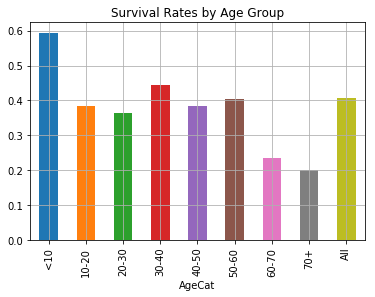

In [14]:
temp = pd.pivot_table(train, index = ['AgeCat'], values = ['Name'], columns = ['Survived'],aggfunc=len, margins = True )
#print(temp.info())
#print('\n')
#print(temp)
#print('\n')

#creating user friendly column name as the current one is complex
temp.columns = ["zero","one","all"]
#print(temp.info()) # this name is much better now

#adding the % column
temp.eval("all2 = one + zero",inplace = True)
temp.eval("per_survived = one/all2",inplace = True)

#plotting this information
temp['per_survived'].plot(kind = "bar")
plt.title("Survival Rates by Age Group")
plt.grid()


Observations:
* Young children *(less than 10 years old)* have the highest survival rates (~60%) while people older than 60 years have the lowest (~20%)

Conclusion: There is **some degree of association between age and survival rates**

Now, that three important hypothesis have been evaluated. The next task is to start building the model.

***

### Data Preperation

The data will be split into `training` and `validation` sets.

Data pipleines are a nifty way of automating data preperation. This section is focused on building one such pipeline

#### Splitting Data into Training and Validation Sets

I'll be setting aside a small sample for validating the final model. Will be using `Stratefied Sampling` to split the data to ensure that the `validation set` is representative.

The stratefied sampling will be performed on the `Embarked` attribute since since the frequency count of one of the classes of the variable is very low.

In [69]:
#Importing data
train = pd.read_csv("/Users/ramavishwanathan/Desktop/Rama Files/purse/ml_all/ML_Projects/Titanic/train.csv", )

#Creating a categorical version of the passenger class variable
train['Pclass_cat'] = pd.cut(
    train['Pclass'],
    bins = [0,1,2,3],
    labels = [1,2,3]
)

#checking out the newly created variable
pd.pivot_table(train, index = ['Pclass_cat'], values = ['Name'],aggfunc=len, margins = True )

#print(train.info())

,Name
Pclass_cat,
1,216
2,184
3,491
All,891


In [70]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

for train_index, test_index in split.split(train, train["Pclass_cat"]):
    strat_train_set = train.loc[train_index]
    strat_val_set = train.loc[test_index]

#quickly dropping the Pclass_cat variable
for i in (strat_train_set,strat_val_set):
    i.drop("Pclass_cat",axis = 1,inplace = True) #this is the stadard format for deleting the column of a df

print(strat_train_set.info())
print('\n')
print(strat_val_set.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 63 to 417
Data columns (total 12 columns):
PassengerId    757 non-null int64
Survived       757 non-null int64
Pclass         757 non-null int64
Name           757 non-null object
Sex            757 non-null object
Age            609 non-null float64
SibSp          757 non-null int64
Parch          757 non-null int64
Ticket         757 non-null object
Fare           757 non-null float64
Cabin          171 non-null object
Embarked       755 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 76.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 627 to 62
Data columns (total 12 columns):
PassengerId    134 non-null int64
Survived       134 non-null int64
Pclass         134 non-null int64
Name           134 non-null object
Sex            134 non-null object
Age            105 non-null float64
SibSp          134 non-null int64
Parch          134 non-null int64
Ticket         134 non-nu

In [71]:
# seperating the features and the label for both train and val sets
X_train = strat_train_set.drop("Survived",axis = 1, inplace = False)
y_train = strat_train_set[["Survived"]].copy()

X_val = strat_val_set.drop("Survived",axis = 1, inplace = False)
y_val = strat_val_set[["Survived"]].copy()

#print(train.info())
#print(val.info())

#### Building a Transformer Pipeline

This is going to be a great hack, stay tuned.

The following `numeric variables` will be considered:
1. Age
2. Fare

The following `categorical variables` will be considered:
1. Pclass
2. Sex
3. Embarked

In [72]:
num_features = ['Fare','Age']
cat2_features = ['Pclass','Sex','Embarked']

"""
Function Transformers to:
    - add new features
    #- convert age to categorical variable
"""

from numpy import c_ #c_ helps in concatenating 2 arrays along columns

from sklearn.preprocessing import FunctionTransformer

#Getting the indexes of the needed variables
Age_ix, SibSp_ix, Parch_ix = [
    list(train.columns).index(col)
    for col in ("Age", "SibSp", "Parch")]

print(Age_ix,SibSp_ix, Parch_ix) #this works very well

#function definition - add new features
# def add_extra_features(X, add_total_relatives = True):
    
#     if add_total_relatives == True:
#         NumRelatives = X[:,SibSp_ix] + X[:,Parch_ix]
#         return np.c_[X, NumRelatives]
#     else:
#         return X    

# Convert age to categorical variable
# def age_to_categorical(X):
    
#     bins = [0,5, 10, 20, 30, 40, 50, 60, 70, np.inf]
#     names = ['<5','5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70','70+']
#     X['AgeCat'] = pd.cut(X[Age_ix], bins, labels=names)
    
#     X.drop("Age",axis = 1,inplace = True) 
#     X['Age'] = X['AgeCat']
#     X.drop("AgeCat",axis = 1,inplace = True) 
    
#     return X
    
    

"""
Numeric Transformer
"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    #('attribs_adder',FunctionTransformer(add_extra_features, validate = False, kw_args = {"add_total_relatives":True})),
    ('std_scaler', StandardScaler())
])



"""
Cat1 Transformer
"""
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# cat1_transformer = Pipeline([
#     ('inputer_cat',SimpleImputer(strategy = "most_frequent")),
#     ('attribs_adder2',FunctionTransformer(age_to_categorical, validate = False)),
#     ('encoder', OneHotEncoder()),
# ])

    
    
"""
Cat2 Transformer
"""

from sklearn.preprocessing import OneHotEncoder

cat2_transformer = Pipeline([
    ('inputer_cat',SimpleImputer(strategy = "most_frequent")),
    ('encoder2', OneHotEncoder()),
])


"""
Column Tranformer:: Implementing the full pipeline
"""

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat2",cat2_transformer,cat2_features)
])

5 6 7


In [73]:
#Implementing the pipeline

X_train_prep = full_pipeline.fit_transform(X_train)
X_val_prep = full_pipeline.fit_transform(X_val)

print(X_train_prep.shape)
print(X_val_prep.shape)

(757, 10)
(134, 10)


### Training Model and Measuring Performance

I will be trying out a combination of 2 methods, 2 approaches and 4 KPIs to arrive at the best classifier for the Titanic case study

<br>

 **Training Algorithams**:
1. Stochastic Gradient Descent (SGD)
2. Random Forest Classifier

Approaches to **Model Evaluation**:
1. Confusion Matrix
1. Cross Validation
2. Measuring Performance on Validation Set

KPIs for evaluating **Model Performance**:
1. Precision
2. Recall
3. F1
4. ROC AUC



In [74]:
#Trying out SGD
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state = 42)
sgd_model.fit(X_train_prep, y_train)

#Generating Predictions
Y_train_sgd = sgd_model.predict(X_train_prep)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, Y_train_sgd)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[324, 143],
       [ 56, 234]])

In [75]:
# quickly defining a function that will help in calculating key assessment KPI

from sklearn.metrics import precision_score, recall_score, f1_score

def model_performance_scores(train,predicted):
    precision_kpi = precision_score(train,predicted)
    recall_kpi = recall_score(train, predicted)
    f1_kpi = f1_score(train,predicted)
    
    print("model performance scores: ","\n")
    print("Precision = ", precision_kpi)
    print("Recall = ", recall_kpi)
    print("F1 = ", f1_kpi)
    
    print("\n")

model_performance_scores(y_train,Y_train_sgd)


model performance scores:  

Precision =  0.6206896551724138
Recall =  0.8068965517241379
F1 =  0.7016491754122939




A quick interpretation of hese KPI:
1. `Precision` of 62% denotes that the model is able to identify survivers correctly in 62/100 cases. `True Positive / (True Positive + False Positive) 
2. `Recall` of 80% denotes that model is able to identify 80 out of 100 survivers. `True Positive / (True Positive + False Negative) `

In [76]:
# Cross Validation to get a better understanding of the model performance

from sklearn.model_selection import cross_val_score

cross_val_score_sgd = cross_val_score(sgd_model,X_train_prep, y_train, cv=5, scoring = "accuracy")

print("Cross Validation Scores for SGD: ",cross_val_score_sgd)
print("Mean of Cross Val Scores for SGD: ",cross_val_score_sgd.mean())

Cross Validation Scores for SGD:  [0.75657895 0.68421053 0.77483444 0.63576159 0.76821192]
Mean of Cross Val Scores for SGD:  0.7239194841408156


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will

We are still getting accuracy in the range of 63-77% with an average of 72%. 

The next step is to get predictions via Cross Validation and then compute the KPIs - Precision, Recall and F1.

In [78]:
from sklearn.model_selection import cross_val_predict

sgd_train_predict_cv = cross_val_predict(sgd_model,X_train_prep, y_train, cv=5)

confusion_matrix(train_label,sgd_train_predict_cv)

# evaluating the model performance
model_performance_scores(train_label,sgd_train_predict_cv)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will

NameError: name 'train_label' is not defined

Interestingly, this throws a better picture. The low `recall` value suggests that the model is performing poorly in identifying all the survivors.

So, at the moment, we have one model `sgd_model` and 2 sets of predictions:
1. `sgd_predict` Predictions generated via Stochastic Gradient Descent (SGD), F1 score of 70%
2. `sgd_train_predict_cv` Predictions generated vis SGD and Cross Validation (CV), F1 score of 69% with a poor recall value of 63%

The second version (SGD + CV) portrays a more reliable picture regarding the accuracy of an SGD model.



***

Implementing a **Random Forest Classifier**

In [79]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_model.fit(X_train_prep,y_train)

#cross validation scores
cross_val_score_forest = cross_val_score(forest_model,X_train_prep, y_train, cv=5, scoring = "accuracy")

print("Cross Validation Scores for Forest: ",cross_val_score_forest)
print("Mean of Cross Val Scores for Forest: ",cross_val_score_forest.mean())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was

Cross Validation Scores for Forest:  [0.80921053 0.84210526 0.81456954 0.80794702 0.77483444]
Mean of Cross Val Scores for Forest:  0.8097333565702336


In [208]:
#generating predictions using cross validation
Y_train_forest_cv = cross_val_predict(forest_model,X_train_prep, y_train, cv=5)

#model performance scores 
model_performance_scores(y_train,Y_train_forest_cv)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 

model performance scores:  

Precision =  0.7739463601532567
Recall =  0.696551724137931
F1 =  0.7332123411978222




/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


**Random Forest Classifier** performs considerably better than the **SGD Classifier**

The next task is to quickly generate the prediction scores, which in-turn will be used to generate the `ROC AUC` value. 

In [209]:
Y_scores_sgd = cross_val_predict(sgd_model, X_train_prep, y_train, cv=3,
                             method="decision_function")

Y_scores_forest = cross_val_predict(forest_model, X_train_prep, y_train, cv=3)

from sklearn.metrics import roc_auc_score

print("ROC AUC for SGD is: ",roc_auc_score(y_train, Y_scores_sgd))
print("ROC AUC for Random Forest Classifier is: ",roc_auc_score(y_train, Y_scores_forest))


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol w

ROC AUC for SGD is:  0.8252344384552905
ROC AUC for Random Forest Classifier is:  0.7862327401609688


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


**The Verdict**:

***

### Executing the model on the test set

In [210]:
# Model performance on validation set -- SGD

Y_val_sgd = sgd_model.predict(X_val_prep)

model_performance_scores(y_val, Y_val_sgd) #SGD performs poorly from a precision standpoint

model performance scores:  

Precision =  0.6197183098591549
Recall =  0.8461538461538461
F1 =  0.7154471544715447




In [211]:
# Model performance on validation set -- Random Forest

Y_val_forest = forest_model.predict(X_val_prep)

model_performance_scores(y_val, Y_val_forest) #SGD performs poorly from a recall standpoint

model performance scores:  

Precision =  0.8444444444444444
Recall =  0.7307692307692307
F1 =  0.7835051546391751




In [55]:
#Importing data
test = pd.read_csv("/Users/ramavishwanathan/Desktop/Rama Files/purse/ml_all/ML_Projects/Titanic/test.csv" )

#data preperation
X_test_prep= full_pipeline.fit_transform(test)

X_test_prep.shape

(418, 10)

In [220]:
Y_test = sgd_model.predict(X_test_prep)

output = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived': Y_test})

#output.head()
#output.info()
#print(os.getcwd())

#write out this dataframe as CSV
output.to_csv("out_sg2.csv")


Summary of all the attempts and experiements:
1. SGD with `Age, Fare, Pclass, Sex, Embarked` performed poorly with a score of 66%
2. Random Forest *(n_est = 100)* with `Age, Fare, Pclass, Sex, Embarked` performed well with a score of 72%

#### Next Step 

SGD and Random Forest with a categorical variant of Age variable `AgeCat`, plus a `NumRelatives` var which is sum of `SibSp` and `Parch`

To achieve this goal, we need to create a new **pipeline**

#### A more elegant pipleine that does more 

In [82]:
"""
Nice Kickass Pipeline
"""



# Input: X_train, y_train, X_val, y_val

def add_extra_features(X, add_relatives = True):
    
    X['NumRelatives'] = X['SibSp'] + X['Parch']
        
    bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, np.inf]
    names = ['0-5','5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70','70+']
    
    X['AgeCat'] = pd.cut(X['Age'], bins, labels=names)
    
        
    return X


X_train_mod = add_extra_features(X_train)
X_val_mod = add_extra_features(X_val)
X_test_mod = add_extra_features(test)

# print(X_train_prep.info())
# print(X_val_prep.info())
# print(X_test_prep.info())

num_features = ['Fare','NumRelatives']
cat_features = ['Pclass','Embarked','Sex','AgeCat']


"""
Individual Transformers for Num and Cat
"""

num_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])


cat_transformer = Pipeline([
    ('inputer_cat',SimpleImputer(strategy = "most_frequent")),
    ('encoder', OneHotEncoder()),
])


"""
Column Tranformer:: Implementing the full pipeline
"""

from sklearn.compose import ColumnTransformer

full_pipeline3 = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features)
])

In [88]:
#Implementing the pipelines

X_train_prep = full_pipeline3.fit_transform(X_train_mod)
X_val_prep = full_pipeline3.fit_transform(X_val_mod)
X_test_prep = full_pipeline3.fit_transform(X_test_mod)


print(X_train_prep.shape)
print(y_train.shape)

(757, 19)
(757, 1)


In [92]:
#Implementing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

forest_model2 = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_model2.fit(X_train_prep,y_train)


Y_train_forest = forest_model2.predict(X_train_prep)

model_performance_scores(y_train,Y_train_forest)


#quickly generating val set accuracy
Y_val_forest = forest_model2.predict(X_val_prep)
model_performance_scores(y_val,Y_val_forest)


model performance scores:  

Precision =  0.9602888086642599
Recall =  0.9172413793103448
F1 =  0.9382716049382716


model performance scores:  

Precision =  0.8372093023255814
Recall =  0.6923076923076923
F1 =  0.7578947368421053




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [93]:
Y_test = forest_model2.predict(X_test_prep)

output = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived': Y_test})

#output.head()
#output.info()
#print(os.getcwd())

#write out this dataframe as CSV
output.to_csv("out_rf2.csv")


This version performs reasonably well and yields an accuracy of ~73%. I'll be attempting SGD next up

In [94]:
#Implementing SGD Model
from sklearn.linear_model import SGDClassifier


sgd_model2 = SGDClassifier()
sgd_model2.fit(X_train_prep,y_train)


Y_train_sgd = sgd_model2.predict(X_train_prep)

model_performance_scores(y_train,Y_train_sgd)


#quickly generating val set accuracy
Y_val_sgd = sgd_model2.predict(X_val_prep)
model_performance_scores(y_val,Y_val_sgd)

model performance scores:  

Precision =  0.46357615894039733
Recall =  0.7241379310344828
F1 =  0.5652759084791386


model performance scores:  

Precision =  0.47126436781609193
Recall =  0.7884615384615384
F1 =  0.5899280575539568




/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The model performs very poorly, not moving ahead with this

In [97]:
#attempting SVMClassifier

from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train_prep, y_train)

Y_train_svc = svm_clf.predict(X_train_prep)

model_performance_scores(y_train,Y_train_svc)


#quickly generating val set accuracy
Y_val_svc = svm_clf.predict(X_val_prep)
model_performance_scores(y_val,Y_val_svc)


model performance scores:  

Precision =  0.8208333333333333
Recall =  0.6793103448275862
F1 =  0.7433962264150944


model performance scores:  

Precision =  0.7
Recall =  0.6730769230769231
F1 =  0.6862745098039216




/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
